In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

admissions = pd.read_csv(r"../database/Dataset/admissions.csv")
daily_metrics = pd.read_csv(r"../database/Dataset/daily_metrics.csv")
hospitals = pd.read_csv(r"../database/Dataset/hospitals.csv")
main_admissions = pd.read_csv(r"../database/Dataset/main_admissions.csv")
main_daily_metrics = pd.read_csv(r"../database/Dataset/main_daily_metrics.csv")
wards = pd.read_csv(r"../database/Dataset/wards.csv")



Concat two datasets

In [181]:
admissions = pd.concat([admissions, main_admissions], ignore_index=True)
daily_metrics = pd.concat([daily_metrics, main_daily_metrics], ignore_index=True)



In [182]:
list_data = [("admissions", admissions), ("daily_metrics", daily_metrics), ("hospitals", hospitals), ("wards", wards)]

for name, data in list_data:
    print(name)
    print(f"{round(data.isnull().mean() * 100, 2)}\n")

    print(data.duplicated().sum())
    print(data.describe(include=("O", "category")))
    print("="*50)

    

admissions
ï»¿admission_id        99.68
date                    0.00
hospital_id             0.00
ward_code               0.00
arrival_source          0.00
triage_level           68.63
wait_minutes            0.00
length_of_stay_days     0.00
outcome                 0.00
age                     0.00
sex                     0.00
procedure_flag          0.00
admission_id            0.32
dtype: float64

0
              date ward_code arrival_source  triage_level     outcome     sex
count       169276    169276         169276       53104.0      169276  169276
unique        1096         5              4          12.0           5       3
top     2022-11-27        ED           self           3.0  discharged       F
freq           180     53062         101509       21068.0      159360   84782
daily_metrics
ï»¿date                   97.52
hospital_id                0.00
ward_code                  0.00
base_beds                  0.00
effective_capacity         0.00
occupancy                  0.0

# Calculate Outliers using Empirical Rule

**Strict**

**Focus on the why and the when**


- mean
- standard deviation

lower = mean - (3 * standard deviation)

upper = mean + (3 * standard deviation)

- anything below the lower bound is an outlier
- anything above the upper bound is an outlier

In [183]:
for name, data in list_data:
    print(name)

    for col in data.select_dtypes(include="number").columns.to_list():
        mean = data[col].mean()
        std = data[col].std()

        lower = mean - (3 * std)
        upper = mean + (3 * std)

        outliers = data[(data[col] < lower) | (data[col] > upper)]

        print(col)
        print(len(outliers))
        print("-"*50)
    
    print("="*50)         

admissions
ï»¿admission_id
0
--------------------------------------------------
hospital_id
0
--------------------------------------------------
wait_minutes
1393
--------------------------------------------------
length_of_stay_days
918
--------------------------------------------------
age
230
--------------------------------------------------
procedure_flag
1
--------------------------------------------------
admission_id
0
--------------------------------------------------
daily_metrics
hospital_id
0
--------------------------------------------------
base_beds
0
--------------------------------------------------
effective_capacity
0
--------------------------------------------------
occupancy
0
--------------------------------------------------
overflow
123
--------------------------------------------------
admissions
40
--------------------------------------------------
discharges
0
--------------------------------------------------
staffing_index
23
------------------------------

# Drop irrelevant columns

In [184]:
cols_to_drop = ["ï»¿admission_id" , "admission_id", "ï»¿date"]

for name, data in list_data:
    print(name)

    for col in cols_to_drop:
        if col in data.columns:
            data.drop(columns=[col], axis=1, inplace=True)


admissions
daily_metrics
hospitals
wards


In [185]:
admissions.columns

Index(['date', 'hospital_id', 'ward_code', 'arrival_source', 'triage_level',
       'wait_minutes', 'length_of_stay_days', 'outcome', 'age', 'sex',
       'procedure_flag'],
      dtype='object')

### Fill Null Values

**Focus on the What, Why, and When**

- Forward fill
- Backward fill
- Grouped mode imputation
- KNN imputer
- Interpolation                                       

### Dealing with outliers
The what, the why, and the when

-  Winsorization
- Scaling/log transformation

In [186]:
admissions['triage_level'].dtype

dtype('O')

In [187]:
admissions['triage_level'].value_counts()

triage_level
3.0    21068
4.0    15812
2.0     7897
5.0     5217
1.0     2566
3.0      214
4.0      155
2.0       76
5.0       69
1.0       28
6.5        1
abc        1
Name: count, dtype: int64

In [188]:
values_to_replace = {
    "6.5": None,
    "abc": None
}

admissions['triage_level'].replace(values_to_replace, inplace=True)

C:\Users\hilla.HILLARY\AppData\Local\Temp\ipykernel_51096\2366194262.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  admissions['triage_level'].replace(values_to_replace, inplace=True)


In [189]:
admissions.head(10)

,date,hospital_id,ward_code,arrival_source,triage_level,wait_minutes,length_of_stay_days,outcome,age,sex,procedure_flag
0,2022-10-28,1,ED,referral,4.0,189,0,discharged,48,M,0.0
1,2022-10-28,1,ICU,ambulance,4.0,189,0,transferred,93,F,0.0
2,2022-10-28,1,ED,self,NaN,189,0,discharged,52,M,0.0
3,2022-10-28,1,MED,self,3.0,189,0,discharged,64,M,0.0
4,2022-10-28,1,ED,self,4.0,189,0,discharged,59,M,0.0
5,2022-10-28,1,SURCG,referral,None,189,0,transferred,28,F,0.0
6,2022-10-28,1,ED,ambulance,2.0,-15,0,discharged,39,M,0.0
7,2022-10-28,1,MED,self,4.0,189,0,discharged,65,F,0.0
8,2022-10-28,1,ED,self,3.0,189,0,transferred,0,M,0.0
9,2022-10-28,1,ED,ambulance,3.0,189,0,discharged,57,F,0.0


In [190]:
admissions['ward_code'].nunique()

5

In [191]:
cols_to_fill = ['triage_level', 'date']

for name, data in list_data:
    print(name)
    for col in cols_to_fill:
        if 'triage_level' in data.columns:
            data['triage_level'] = data.groupby('arrival_source')['triage_level'].transform(lambda x: x.fillna(x.mode()[0])) # grouped mod imputation

        if 'date' in data.columns:
            data['date'] = pd.to_datetime(data['date'], errors='coerce')
            data['date'] = data['date'].fillna(method='ffill')
            data['date'] = data['date'].fillna(method='bfill')
            data['date'].interpolate()

            # data['date'].ffill()
            # data['date'].bfill()


admissions
daily_metrics
hospitals
wards


C:\Users\hilla.HILLARY\AppData\Local\Temp\ipykernel_51096\236986377.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['date'] = data['date'].fillna(method='ffill')
C:\Users\hilla.HILLARY\AppData\Local\Temp\ipykernel_51096\236986377.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['date'] = data['date'].fillna(method='bfill')
C:\Users\hilla.HILLARY\AppData\Local\Temp\ipykernel_51096\236986377.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['date'] = data['date'].fillna(method='ffill')
C:\Users\hilla.HILLARY\AppData\Local\Temp\ipykernel_51096\236986377.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['d

# Handling Outliers using Winsorization Technique

In [192]:
for name, data in list_data:
    for col in data.select_dtypes(include='number').columns.to_list():
        lower = data[col].quantile(0.05)
        upper = data[col].quantile(0.95)

        data[col].clip(lower=lower, upper=upper, inplace=True)

C:\Users\hilla.HILLARY\AppData\Local\Temp\ipykernel_51096\4293296851.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].clip(lower=lower, upper=upper, inplace=True)
C:\Users\hilla.HILLARY\AppData\Local\Temp\ipykernel_51096\4293296851.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [193]:
admissions['arrival_source'].unique()

array(['referral', 'ambulance', 'self', 'transfer'], dtype=object)

In [194]:
for name, data in list_data:
    print(name)
    for col in data.select_dtypes('object', 'category').columns.to_list():
        print(data[col].value_counts())
        print('-'*50)

admissions
ward_code
ED       53062
MED      43818
ICU      40814
SURG     31569
SURCG       13
Name: count, dtype: int64
--------------------------------------------------
arrival_source
self         101509
ambulance     30671
referral      25299
transfer      11797
Name: count, dtype: int64
--------------------------------------------------
triage_level
3.0    137242
4.0     15812
2.0      7897
5.0      5217
1.0      2566
3.0       214
4.0       155
2.0        76
5.0        69
1.0        28
Name: count, dtype: int64
--------------------------------------------------
outcome
discharged     159360
readmit_30d      4451
transferred      4150
death            1314
unknown             1
Name: count, dtype: int64
--------------------------------------------------
sex
F    84782
M    84493
X        1
Name: count, dtype: int64
--------------------------------------------------
daily_metrics
ward_code
MED      5500
ICU      5499
ED       5475
SURG     5475
SURCG      24
Name: count, dtype: in

In [195]:
# Drop duplicates (Admissions)
admissions.drop_duplicates(inplace=True)

In [196]:
# Drop duplicates (daily_metrics)
daily_metrics.drop_duplicates(inplace=True)

In [197]:
admissions.head()

,date,hospital_id,ward_code,arrival_source,triage_level,wait_minutes,length_of_stay_days,outcome,age,sex,procedure_flag
0,2022-10-28,1,ED,referral,4.0,189,0,discharged,48,M,0.0
1,2022-10-28,1,ICU,ambulance,4.0,189,0,transferred,86,F,0.0
2,2022-10-28,1,ED,self,3.0,189,0,discharged,52,M,0.0
3,2022-10-28,1,MED,self,3.0,189,0,discharged,64,M,0.0
4,2022-10-28,1,ED,self,4.0,189,0,discharged,59,M,0.0


### Wards information

In [198]:
wards.head()

,hospital_id,ward_id,ward_code,ward_name,base_beds
0,1,01-ED,ED,Emergency Department,30
1,1,01-ICU,ICU,Intensive Care Unit,20
2,1,01-MED,MED,General Medicine,50
3,1,01-SURG,SURG,Surgery,40
4,2,02-ED,ED,Emergency Department,30


### Daily Metrics Information

In [199]:
daily_metrics.head()

,hospital_id,ward_code,base_beds,effective_capacity,occupancy,overflow,admissions,discharges,staffing_index,avg_wait_minutes,admission_rate_per_bed,discharge_rate_per_bed,occupancy_rate,date
0,1,MED,30,34,34,26,51,17,0.999,219,1.700,0.567,1.0,2022-10-28
1,1,SURCG,30,34,34,35,62,31,0.938,223,2.067,1.033,1.0,2022-10-28
2,1,ICU,30,34,34,39,63,28,0.953,275,2.100,0.933,1.0,2022-10-28
3,1,ED,30,34,34,26,56,33,0.974,227,1.867,1.100,1.0,2022-10-28
4,1,MED,30,34,34,29,55,30,1.013,257,1.833,1.000,1.0,2022-10-28


## Exploratory Data Analysis

In [200]:
def EDA_Stage_1(data, name):
  print("="*100)
  print(f"{name} dataset information")
  print(data.info())
  print("="*100)
  print(f"{name} dataset description")
  print(data.describe())
  print("="*100)
  print(f"{name} dataset shape")
  print(data.shape)
  print("="*100)
  print(f"{name} dataset columns")
  print(data.columns)
  print("="*100)
  print(f"{name} dataset null values")
  print(data.isna().sum())
  print("="*100)
  print(f"{name} dataset duplicate values")
  print(data.duplicated().sum())
  print("="*100)

In [201]:
EDA_Stage_1(admissions, "Admissions details")

Admissions details dataset information
<class 'pandas.core.frame.DataFrame'>
Index: 168828 entries, 0 to 169275
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 168828 non-null  datetime64[ns]
 1   hospital_id          168828 non-null  int64         
 2   ward_code            168828 non-null  object        
 3   arrival_source       168828 non-null  object        
 4   triage_level         168828 non-null  object        
 5   wait_minutes         168828 non-null  int64         
 6   length_of_stay_days  168828 non-null  int64         
 7   outcome              168828 non-null  object        
 8   age                  168828 non-null  int64         
 9   sex                  168828 non-null  object        
 10  procedure_flag       168827 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 15.5+ MB
None
Admissions det

In [202]:
EDA_Stage_1(daily_metrics, "Daily Metrics Information")

Daily Metrics Information dataset information
<class 'pandas.core.frame.DataFrame'>
Index: 21968 entries, 0 to 21972
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   hospital_id             21968 non-null  int64         
 1   ward_code               21968 non-null  object        
 2   base_beds               21968 non-null  int64         
 3   effective_capacity      21968 non-null  int64         
 4   occupancy               21968 non-null  int64         
 5   overflow                21968 non-null  int64         
 6   admissions              21968 non-null  int64         
 7   discharges              21968 non-null  int64         
 8   staffing_index          21968 non-null  float64       
 9   avg_wait_minutes        21968 non-null  int64         
 10  admission_rate_per_bed  21968 non-null  float64       
 11  discharge_rate_per_bed  21968 non-null  float64       
 12  occup

In [203]:
EDA_Stage_1(wards, "Wards Information")

Wards Information dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hospital_id  20 non-null     int64 
 1   ward_id      20 non-null     object
 2   ward_code    20 non-null     object
 3   ward_name    20 non-null     object
 4   base_beds    20 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 932.0+ bytes
None
Wards Information dataset description
       hospital_id  base_beds
count    20.000000  20.000000
mean      3.000000  35.000000
std       1.450953  11.470787
min       1.000000  20.000000
25%       2.000000  27.500000
50%       3.000000  35.000000
75%       4.000000  42.500000
max       5.000000  50.000000
Wards Information dataset shape
(20, 5)
Wards Information dataset columns
Index(['hospital_id', 'ward_id', 'ward_code', 'ward_name', 'base_beds'], dtype='object')
Wards Information dataset null values
hosp

In [204]:
EDA_Stage_1(hospitals, "Hospitals Information")

Hospitals Information dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hospital_id    5 non-null      float64
 1   hospital_name  5 non-null      object 
 2   city           5 non-null      object 
 3   country        5 non-null      object 
 4   latitude       5 non-null      float64
 5   longitude      5 non-null      float64
 6   founded_year   5 non-null      float64
dtypes: float64(4), object(3)
memory usage: 412.0+ bytes
None
Hospitals Information dataset description
       hospital_id   latitude  longitude  founded_year
count     5.000000   5.000000   5.000000      5.000000
mean      3.000000  62.754064  25.790020   1998.760000
std       1.456022   1.548164   2.023539      9.475653
min       1.200000  60.683280  23.141780   1982.800000
25%       2.000000  61.654000  25.072100   1998.000000
50%       3.000000  63.28680

### Stage 2 EDA

In [205]:
admissions['triage_level'].dtype

dtype('O')

In [206]:
admissions['triage_level'].isna().sum()

np.int64(0)

In [207]:
admissions['triage_level'].value_counts()

triage_level
3.0    136908
4.0     15726
2.0      7884
5.0      5204
1.0      2565
3.0       213
4.0       155
2.0        76
5.0        69
1.0        28
Name: count, dtype: int64

In [208]:
admissions['triage_level'] = admissions['triage_level'].astype(str).str.strip()


In [209]:
admissions['triage_level'].value_counts()

triage_level
3.0    137121
4.0     15881
2.0      7960
5.0      5273
1.0      2593
Name: count, dtype: int64

In [210]:
print(f"There are {len(admissions['triage_level'].value_counts())} triage levels in this dataset")
level3_count = (admissions['triage_level'] == "3.0").sum()
print(f"The dataset is dominated by {level3_count} triage level 3 patients.")

There are 5 triage levels in this dataset
The dataset is dominated by 137121 triage level 3 patients.


In [211]:
admissions['arrival_source'].value_counts()

arrival_source
self         101122
ambulance     30635
referral      25279
transfer      11792
Name: count, dtype: int64

In [212]:
print(f"There are {len(admissions['arrival_source'].value_counts())} arrival sources of patients in this dataset")
arrival_source_self_count = (admissions['arrival_source'] == "self").sum()
print(f"The dataset is dominated by {arrival_source_self_count} self arrival source patients.")

There are 4 arrival sources of patients in this dataset
The dataset is dominated by 101122 self arrival source patients.


In [213]:
admissions['outcome'].value_counts()

outcome
discharged     158918
readmit_30d      4451
transferred      4144
death            1314
unknown             1
Name: count, dtype: int64

In [214]:
print(f"There are {len(admissions['outcome'].value_counts())} patient outcomes in this dataset")
discharged_count = (admissions['outcome'] == 'discharged').sum()
print(f"The dataset is dominated by {discharged_count} discharged patients")


There are 5 patient outcomes in this dataset
The dataset is dominated by 158918 discharged patients


In [215]:
print(f"The total number of wait minutes of patients is: {admissions['wait_minutes'].sum()}")
print(f"The average wait minutes of patients is: {admissions['wait_minutes'].mean()}")
print(f"The total length of stay for patients is: {admissions['length_of_stay_days'].sum()}")
print(f"The average length of stay for patients is: {admissions['length_of_stay_days'].mean()}")


The total number of wait minutes of patients is: 32341397
The average wait minutes of patients is: 191.5641777430284
The total length of stay for patients is: 497579
The average length of stay for patients is: 2.9472540099983413


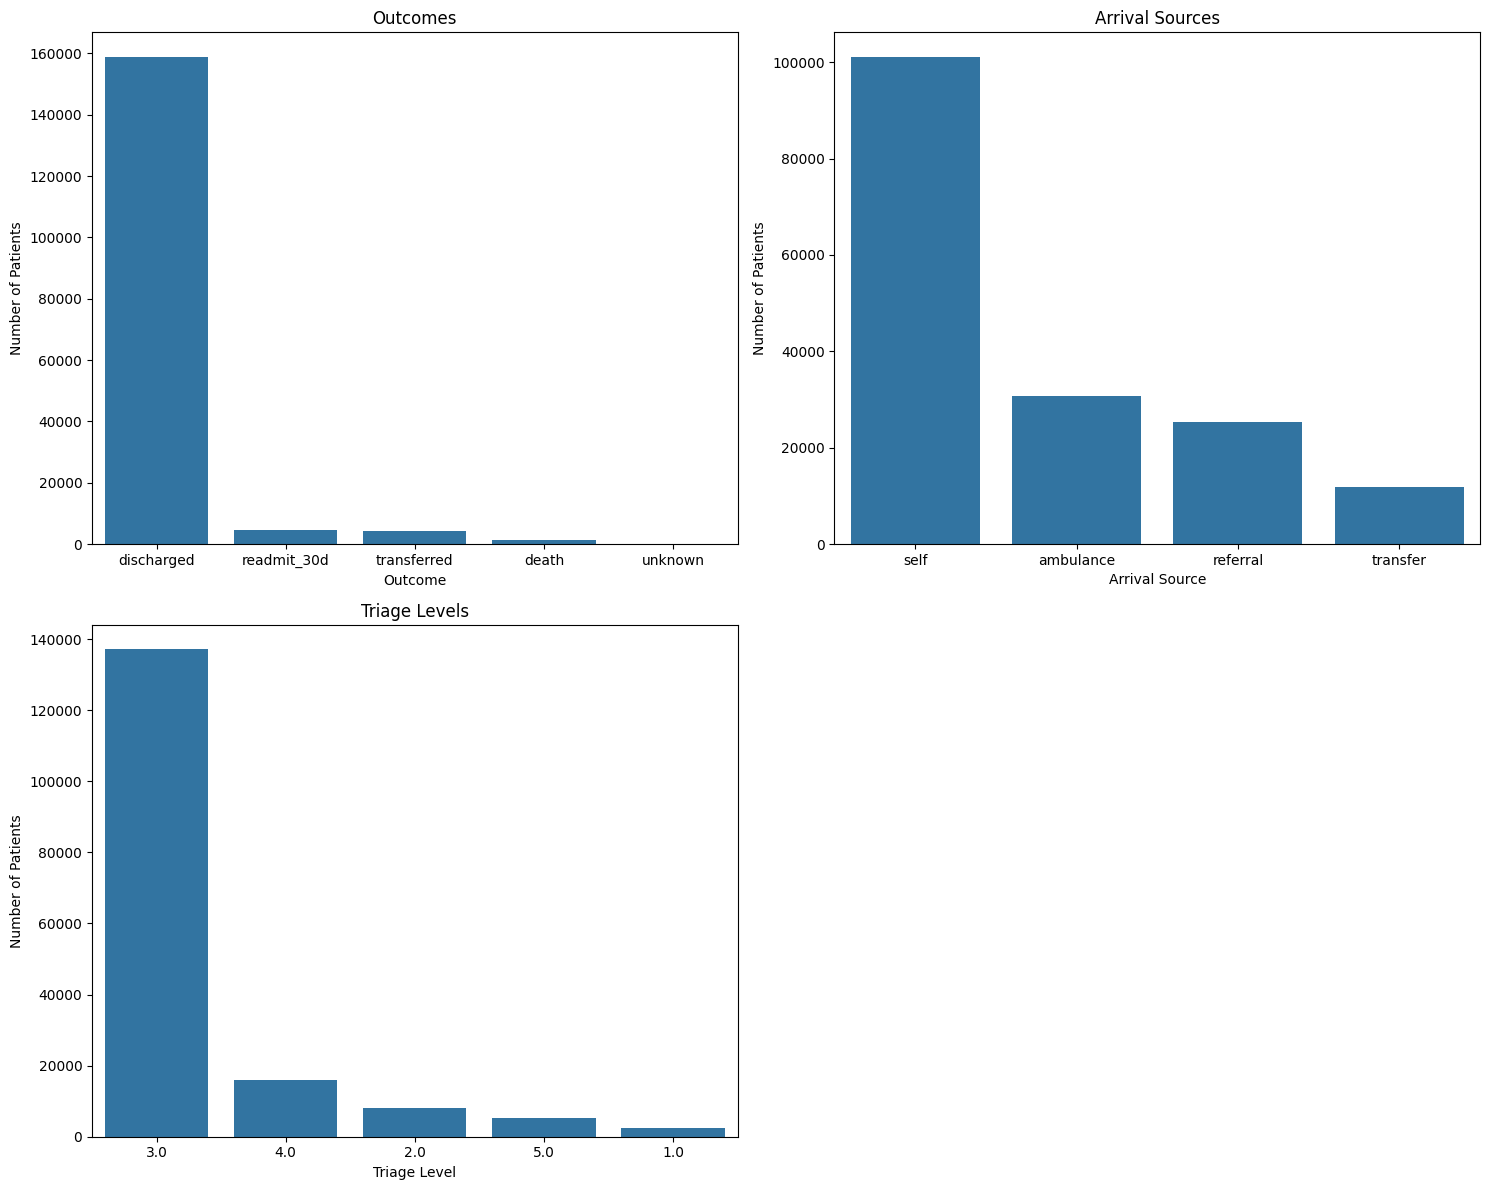

In [216]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
outcome_value_counts = admissions['outcome'].value_counts()
sns.barplot(x=outcome_value_counts.index, y=outcome_value_counts.values)
plt.title("Outcomes")
plt.xlabel("Outcome")
plt.ylabel("Number of Patients")

plt.subplot(2,2,2)
arrival_source_value_counts = admissions['arrival_source'].value_counts()
sns.barplot(x=arrival_source_value_counts.index, y=arrival_source_value_counts.values)
plt.title("Arrival Sources")
plt.xlabel("Arrival Source")
plt.ylabel("Number of Patients")

plt.subplot(2,2,3)
triage_level_value_counts = admissions['triage_level'].value_counts()
sns.barplot(x=triage_level_value_counts.index, y=triage_level_value_counts.values)
plt.title("Triage Levels")
plt.xlabel("Triage Level")
plt.ylabel("Number of Patients")

plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

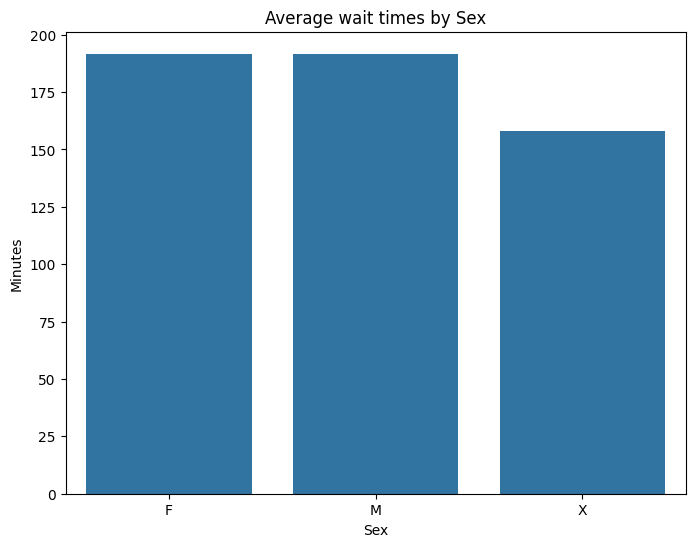

In [217]:
plt.figure(figsize=(10,8))

wait_times_by_sex = admissions.groupby('sex')['wait_minutes'].mean()

plt.figure(figsize=(8,6))
sns.barplot(x=wait_times_by_sex.index, y=wait_times_by_sex.values)
plt.title("Average wait times by Sex")
plt.xlabel("Sex")
plt.ylabel("Minutes")
plt.show()

<Figure size 1000x800 with 0 Axes>

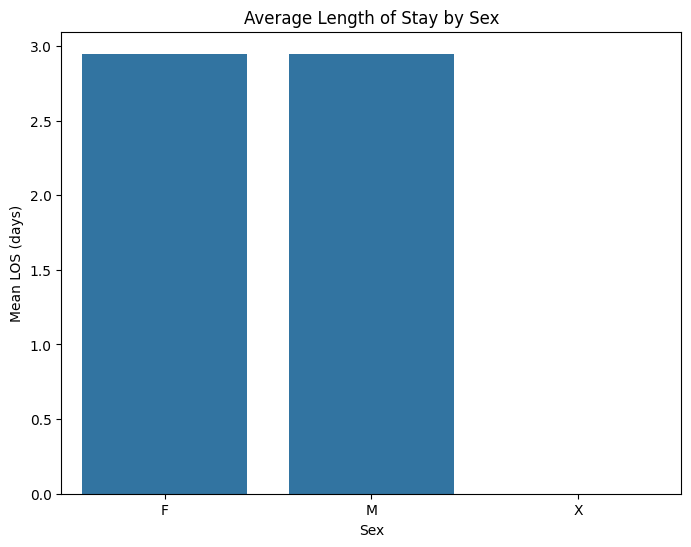

In [218]:
plt.figure(figsize=(10,8))

los_by_sex = admissions.groupby('sex')['length_of_stay_days'].mean()

plt.figure(figsize=(8,6))
sns.barplot(x=los_by_sex.index, y=los_by_sex.values)
plt.title("Average Length of Stay by Sex")
plt.xlabel("Sex")
plt.ylabel("Mean LOS (days)")
plt.show()

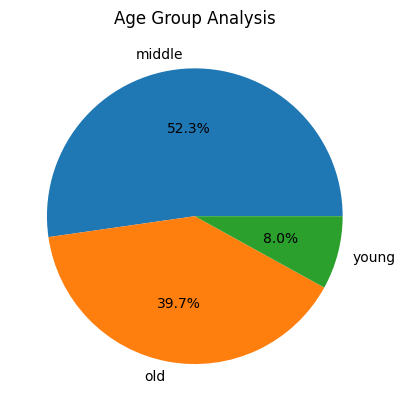

In [219]:
import numpy as np

# Segment patients into 3 age categories: young (<30), middle (30-60), premium (>60)
admissions['age_group'] = pd.cut(admissions['age'], bins=[-np.inf, 30, 60, np.inf], labels=['young', 'middle', 'old'])
plt.pie(admissions['age_group'].value_counts(), labels=admissions['age_group'].value_counts().index, autopct='%1.1f%%')
plt.title('Age Group Analysis')
plt.show()

In [220]:
admissions.columns

Index(['date', 'hospital_id', 'ward_code', 'arrival_source', 'triage_level',
       'wait_minutes', 'length_of_stay_days', 'outcome', 'age', 'sex',
       'procedure_flag', 'age_group'],
      dtype='object')

C:\Users\hilla.HILLARY\AppData\Local\Temp\ipykernel_51096\2637018305.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_outcomes = admissions.groupby(['age_group','outcome']).size().reset_index(name='count')


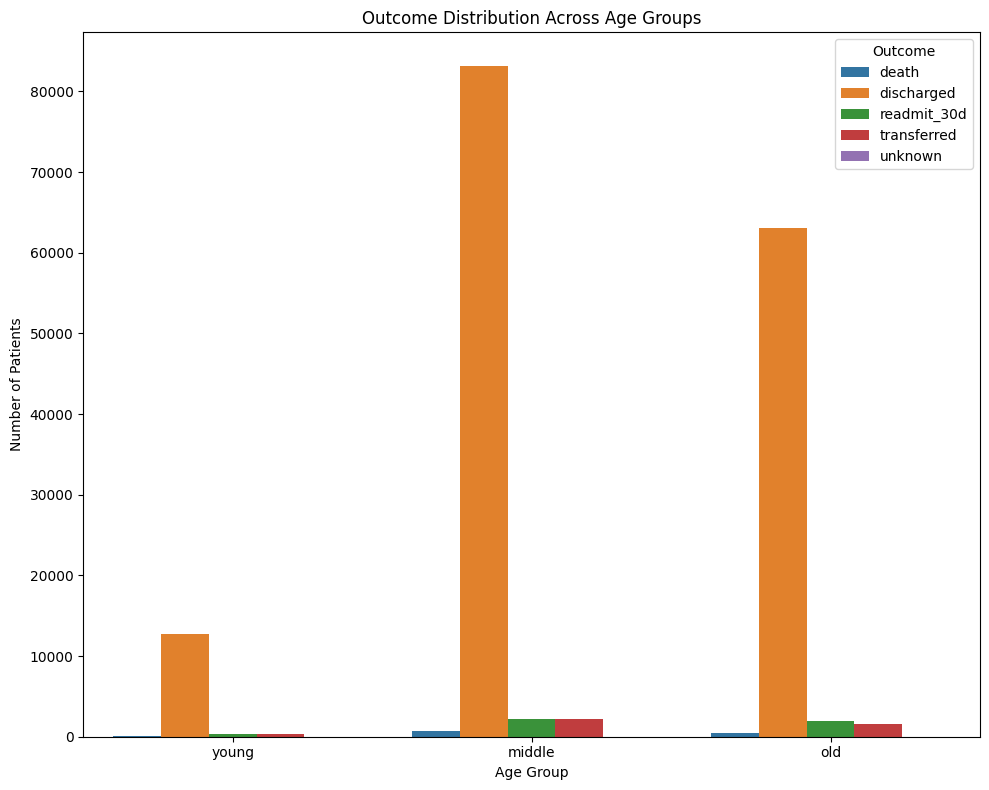

In [221]:
plt.figure(figsize=(10,8))

age_group_outcomes = admissions.groupby(['age_group','outcome']).size().reset_index(name='count')

sns.barplot(data=age_group_outcomes, x='age_group', y='count', hue='outcome')
plt.title("Outcome Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.legend(title="Outcome")
plt.tight_layout()
plt.show()

C:\Users\hilla.HILLARY\AppData\Local\Temp\ipykernel_51096\1601168175.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_triage_levels = admissions.groupby(['age_group','triage_level']).size().reset_index(name='count')


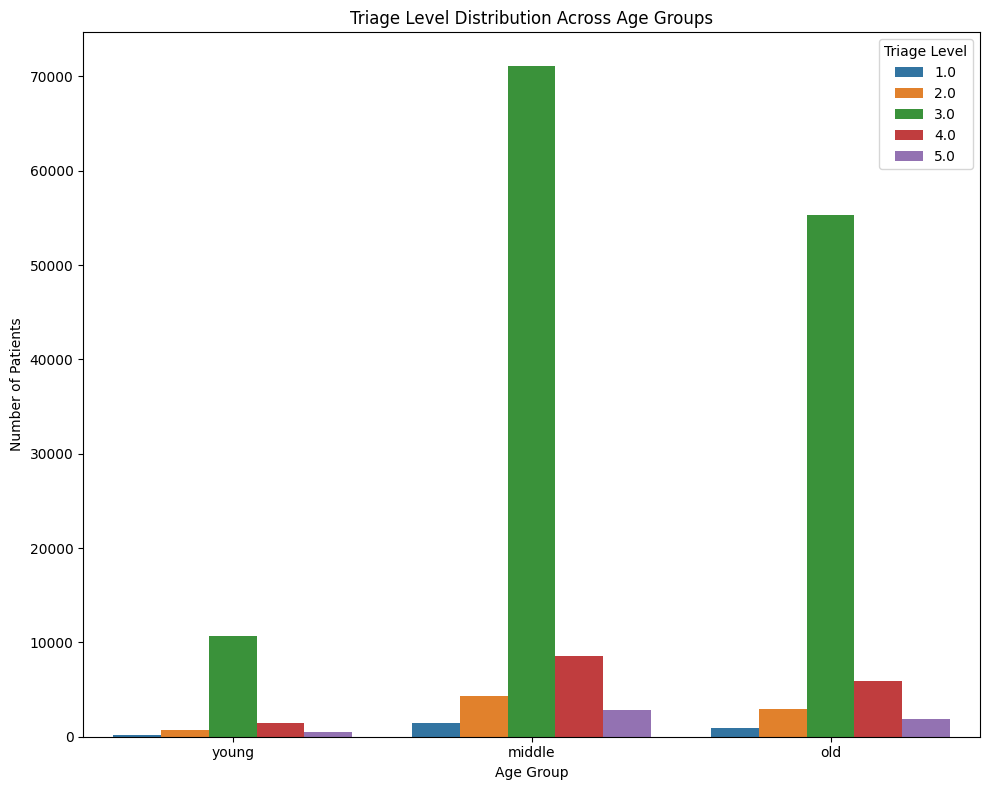

In [222]:
plt.figure(figsize=(10,8))

age_group_triage_levels = admissions.groupby(['age_group','triage_level']).size().reset_index(name='count')

sns.barplot(data=age_group_triage_levels, x='age_group', y='count', hue='triage_level')
plt.title("Triage Level Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.legend(title="Triage Level")
plt.tight_layout()
plt.show()

C:\Users\hilla.HILLARY\AppData\Local\Temp\ipykernel_51096\3330855530.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_wait_minutes = admissions.groupby('age_group')['wait_minutes'].mean()


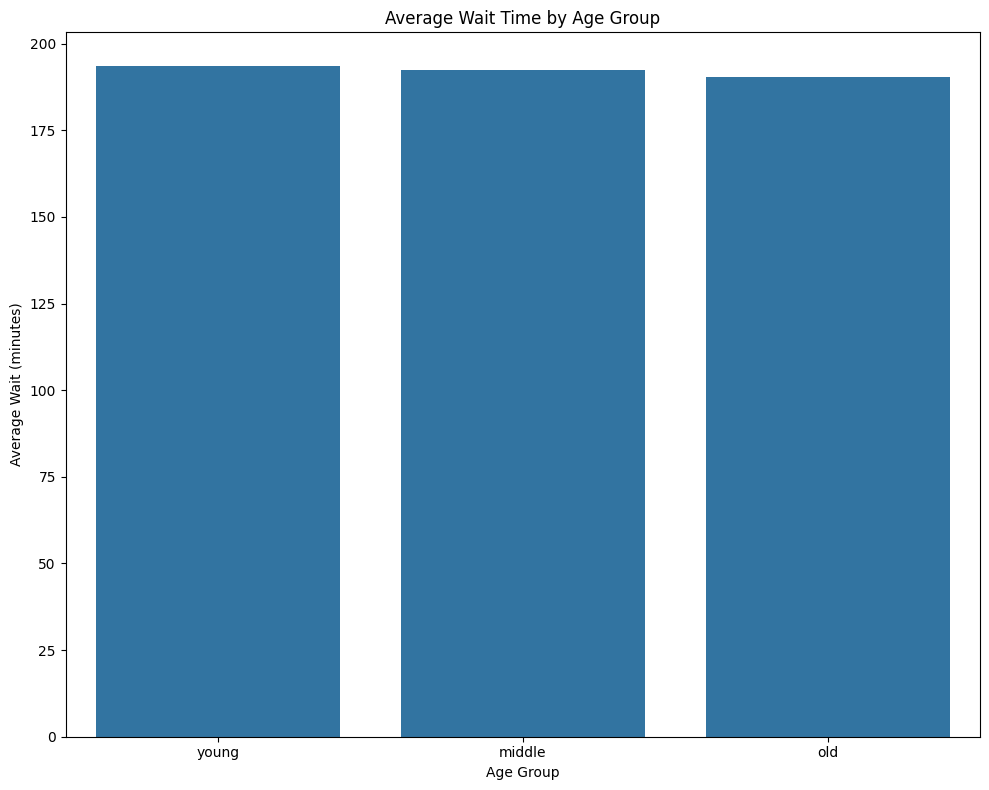

In [223]:
plt.figure(figsize=(10,8))

age_group_wait_minutes = admissions.groupby('age_group')['wait_minutes'].mean()

sns.barplot(x=age_group_wait_minutes.index, y=age_group_wait_minutes.values)
plt.title("Average Wait Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Wait (minutes)")
plt.tight_layout()
plt.show()

C:\Users\hilla.HILLARY\AppData\Local\Temp\ipykernel_51096\2781219271.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_wait_minutes = admissions.groupby('age_group')['length_of_stay_days'].mean()


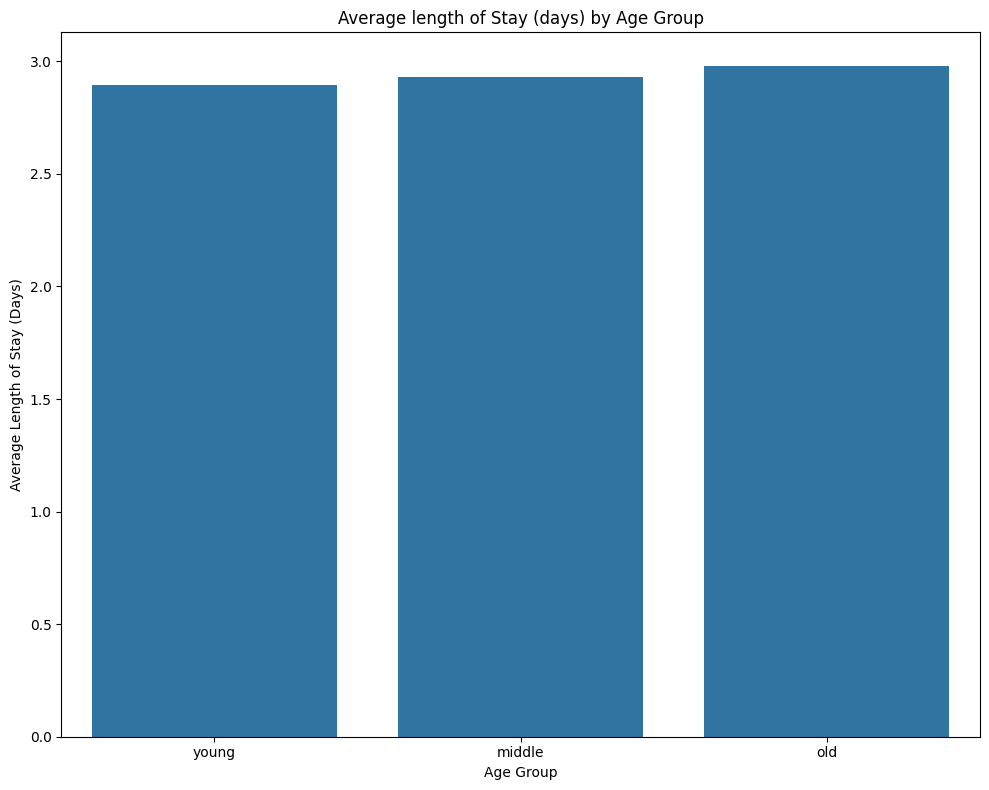

In [224]:
plt.figure(figsize=(10,8))

age_group_wait_minutes = admissions.groupby('age_group')['length_of_stay_days'].mean()

sns.barplot(x=age_group_wait_minutes.index, y=age_group_wait_minutes.values)
plt.title("Average length of Stay (days) by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Length of Stay (Days)")
plt.tight_layout()
plt.show()

### Feature Engineering

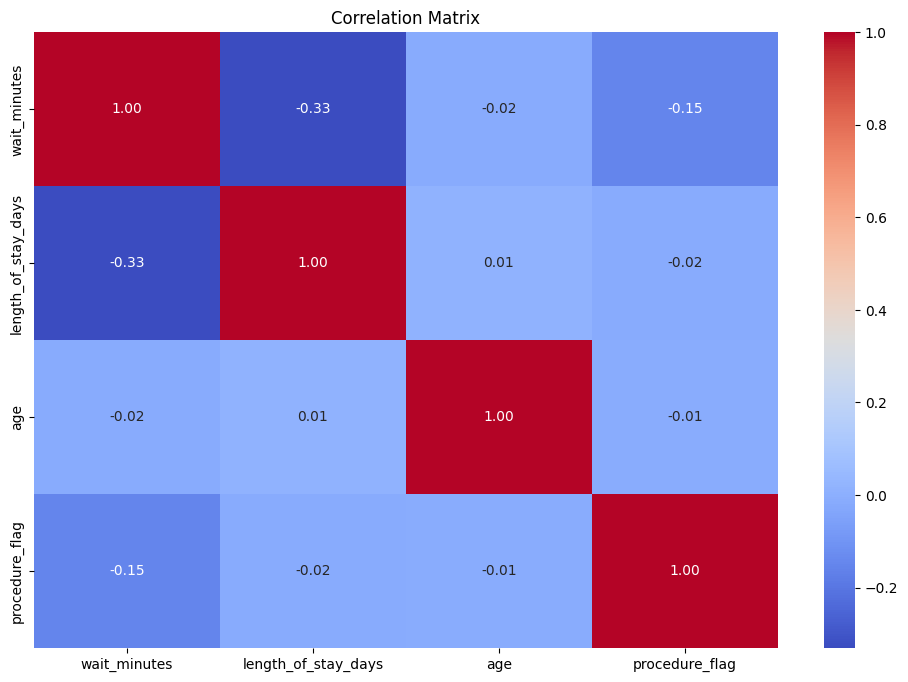

In [225]:
num_cols = admissions.select_dtypes(include="number").drop(columns="hospital_id")
corr = num_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Feature 1: **wait_per_triage**
Purpose: Measures how long each triage level waits, normalized by urgency

Formula: wait_minutes / triage_level

Rationale:
Triage 1 (most urgent) should wait less than Triage 5
A 200-minute wait for Triage 1 is worse than for Triage 5
Normalizing helps identify when urgent patients wait too long

Handling:
Convert triage_level to numeric (invalid values → NaN)
Clip outliers at 95th percentile to avoid extreme values
Fill NaN with median to maintain data integrity

Feature 2: **bed_impact_score**
Purpose: Estimates how much hospital resources this admission will consume

Formula: length_of_stay_days × (1 + procedure_flag) × (6 - triage_level)

Rationale:

Longer stays = more bed days
Procedures increase resource needs (multiplier effect)
Higher urgency (low triage number) = more intensive care
Combined score predicts total resource demand
Example:

ICU patient: 5 days × (1 + 1 procedure) × (6 - 1 triage) = 50 points
ED patient: 0 days × (1 + 0) × (6 - 3) = 0 points



In [226]:
admissions['triage_level'] = pd.to_numeric(admissions['triage_level'], errors="coerce")
admissions['wait_per_triage'] = admissions['wait_minutes'] / admissions['triage_level']

admissions['wait_per_triage'] = admissions['wait_per_triage'].clip(lower=0, upper=admissions['wait_per_triage'].quantile(0.95))
admissions['wait_per_triage'] = admissions['wait_per_triage'].fillna(admissions['wait_per_triage'].median())

admissions['bed_impact_score'] = (admissions['length_of_stay_days'] * (1 + admissions['procedure_flag']) * (6 - pd.to_numeric(admissions['triage_level'], errors="coerce")))

admissions.drop(columns=['triage_level', 'wait_minutes', 'length_of_stay_days', 'procedure_flag'], inplace=True)

# Merging the data

In [227]:
admissions.columns.to_list()

['date',
 'hospital_id',
 'ward_code',
 'arrival_source',
 'outcome',
 'age',
 'sex',
 'age_group',
 'wait_per_triage',
 'bed_impact_score']

In [228]:
daily_metrics.columns.to_list()

['hospital_id',
 'ward_code',
 'base_beds',
 'effective_capacity',
 'occupancy',
 'overflow',
 'admissions',
 'discharges',
 'staffing_index',
 'avg_wait_minutes',
 'admission_rate_per_bed',
 'discharge_rate_per_bed',
 'occupancy_rate',
 'date']

In [229]:
admissions.dtypes

date                datetime64[ns]
hospital_id                  int64
ward_code                   object
arrival_source              object
outcome                     object
age                          int64
sex                         object
age_group                 category
wait_per_triage            float64
bed_impact_score           float64
dtype: object

In [230]:
admissions.select_dtypes(include='number')

,hospital_id,age,wait_per_triage,bed_impact_score
0,1,48,47.250000,0.0
1,1,86,47.250000,0.0
2,1,52,63.000000,0.0
3,1,64,63.000000,0.0
4,1,59,47.250000,0.0
...,...,...,...,...
169271,5,65,34.666667,6.0
169272,5,60,34.666667,18.0
169273,5,81,34.666667,30.0
169274,5,65,35.000000,18.0


In [231]:
daily_metrics.dtypes

hospital_id                        int64
ward_code                         object
base_beds                          int64
effective_capacity                 int64
occupancy                          int64
overflow                           int64
admissions                         int64
discharges                         int64
staffing_index                   float64
avg_wait_minutes                   int64
admission_rate_per_bed           float64
discharge_rate_per_bed           float64
occupancy_rate                   float64
date                      datetime64[ns]
dtype: object

In [232]:
admissions_agg = admissions.groupby(["date", "hospital_id", "ward_code"]).agg(
    {
        "wait_per_triage": "mean",
        "age": "mean",
        "bed_impact_score": "mean",
    }
).reset_index()

categorical_cols = ['arrival_source', 'outcome', 'sex']

for col in categorical_cols:
    counts = (admissions.groupby(['date', 'hospital_id', 'ward_code', col])
              .size()
              .unstack(fill_value=0))
    counts.columns = [f'{col}_{c}' for c in counts.columns]
    admissions_agg = admissions_agg.merge(counts.reset_index(), 
                                          on=['date', 'hospital_id', 'ward_code'], 
                                          how='left')

In [233]:
admissions_agg

,date,hospital_id,ward_code,wait_per_triage,age,bed_impact_score,arrival_source_ambulance,arrival_source_referral,arrival_source_self,arrival_source_transfer,outcome_death,outcome_discharged,outcome_readmit_30d,outcome_transferred,outcome_unknown,sex_F,sex_M,sex_X
0,2022-10-28,1,ED,57.005263,52.315789,0.000,6,3,9,1,0,14,0,5,0,6,13,0
1,2022-10-28,1,ICU,34.225000,56.100000,15.000,2,0,7,1,0,9,0,1,0,4,6,0
2,2022-10-28,1,MED,37.425000,61.400000,12.600,2,1,7,0,0,10,0,0,0,4,6,0
3,2022-10-28,1,SURCG,55.125000,45.500000,0.000,1,1,0,0,0,0,0,2,0,1,1,0
4,2022-10-28,1,SURG,29.000000,61.000000,11.250,0,2,5,1,0,8,0,0,0,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19283,2025-10-26,4,MED,65.000000,55.500000,12.375,1,0,6,1,0,7,1,0,0,2,6,0
19284,2025-10-26,4,SURG,29.000000,47.750000,15.000,1,2,4,1,0,7,1,0,0,6,2,0
19285,2025-10-26,5,ED,71.581944,58.666667,0.000,2,2,8,0,0,12,0,0,0,5,7,0
19286,2025-10-26,5,ICU,46.666667,61.333333,22.500,0,0,3,3,0,6,0,0,0,4,2,0


### Preventing Data Leakage
Why Lag Features? To predict today's admissions, we can only use information from yesterday or earlier.

Lag Strategy:       

**1-day lag:** Yesterday's metrics (recent trend)   

**7-day lag:** Last week's metrics (weekly pattern)

Features to Lag:    

`occupancy` → occupancy_lag1, occupancy_lag7

`overflow` → overflow_lag1, overflow_lag7   

`discharges` → discharges_lag1, discharges_lag7 

`avg_wait_minutes` → avg_wait_lag1, avg_wait_lag7       

`occupancy_rate` → occupancy_rate_lag1, occupancy_rate_lag7 

`admission_rate_per_bed` -> admission_rate_per_bed_lag1, admission_rate_per_bed_lag7

In [234]:
daily_metrics = daily_metrics.sort_values(['hospital_id', 'ward_code', 'date'])

lag_columns = ['occupancy', 'overflow', 'discharges', 'admission_rate_per_bed',
               'avg_wait_minutes', 'occupancy_rate']

for col in lag_columns:
    daily_metrics[f'{col}_lag1'] = daily_metrics.groupby(['hospital_id', 'ward_code'])[col].shift(1)
    daily_metrics[f'{col}_lag7'] = daily_metrics.groupby(['hospital_id', 'ward_code'])[col].shift(7)
    

daily_metrics_safe = daily_metrics.drop(columns=lag_columns)
daily_metrics = daily_metrics_safe.dropna()

### Merge and Export Data

In [236]:
main_data = pd.merge(admissions_agg, daily_metrics, on=['date', 'hospital_id', 'ward_code'], how='inner')
main_data.to_csv(r"C:\Users\hilla.HILLARY\OneDrive\Documents\Desktop\Amdari\Predictive Healthcare Capacity Management\code\database\cleaned_data.csv", index=False)